In [1]:
import pandas as pd
from agent.scoring.template import FVTemplate
from Levenshtein import distance as levenshtein_distance
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def levenshtein_distance_to_wt(mut_list, wt='SRWGGDGFYAMDY'):
    """Computes levenshtein distances to a wt sequence."""
    H = np.array([levenshtein_distance(mut, wt) for mut in mut_list])
    return H

# Analyze successful designs

In [2]:
agent_mpo_10k_scores = pd.read_csv('data/10k_samples/agent_mpo_10k_scores.csv.gz')  # including wild-type

agent_mpo_success = agent_mpo_10k_scores[agent_mpo_10k_scores.is_success > 0][['aa_seqs', 'raw_HER2', 'raw_MHC2', 'raw_FvNetCharge', 'raw_FvCSP', 'raw_HISum']]
len(agent_mpo_success)

2655

## Analyze the variant library in reference to the wild-type

In [3]:
final_seqs = pd.read_csv('data/10k_samples/variant-library.csv.gz')
len(final_seqs), final_seqs.columns

(510,
 Index(['Name', 'aa_seqs', 'raw_HER2', 'raw_MHC2', 'raw_FvNetCharge',
        'raw_FvCSP', 'raw_HISum', 'CamSol score', 'fv_h', 'fv_l'],
       dtype='object'))

In [4]:
final_seqs.drop(0, inplace=True)  # ignore wild-type
final_seqs['wt_dist'] = levenshtein_distance_to_wt(final_seqs['aa_seqs'], 'SRWGGDGFYAMDY')
final_seqs['wt_dist'].max(), final_seqs['wt_dist'].min(), final_seqs['wt_dist'].median()

(8, 2, 6.0)

## Plot distribution curves

In [32]:
def plot_wt_dist_hist(ax, prop='wt_dist', legend_loc="upper right", xlabel=None):
    x = np.linspace(0, 10, 10)
    xlabel = prop if xlabel is None else xlabel
    
    ax.hist(final_seqs[prop].tolist(), bins=x, alpha=0.5)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 200])

def plot_her2_hist(ax, prop='raw_HER2', legend_loc="upper right", xlabel=None):
    x = np.linspace(0, 1, 50)
    xlabel = prop if xlabel is None else xlabel
    
    ax.hist(final_seqs[prop].tolist(), bins=x, alpha=0.5)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 100])

def plot_FvNetCharge_density(ax, prop='raw_FvNetCharge', legend_loc="upper left", xlabel='Fv net charge'):
    x = np.linspace(-1, 12, 50)

    propv = final_seqs[prop].values

    y = stats.gaussian_kde(propv)(x)/sum(stats.gaussian_kde(propv)(x))
    ax.plot(x, y, label="Agent_MPO", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')
    ax.set_xlim([-2, 12])
    ax.set_ylim([0, 0.35])

def plot_FvCSP_density(ax, prop='raw_FvCSP', legend_loc="upper left", xlabel='Fv net charge'):
    x = np.linspace(-9, 27, 50)
    
    propv = final_seqs[prop].values
    
    y = stats.gaussian_kde(propv)(x)/sum(stats.gaussian_kde(propv)(x))
    ax.plot(x, y, label="Agent_MPO", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')
    ax.set_xlim([-10, 30])
    ax.set_ylim([0, 0.4])

def plot_HISum_density(ax, legend_loc="upper left", xlabel=None):
    x = np.linspace(-1, 10, 50)
    prop = 'raw_HISum'
    propv = final_seqs[prop].values

    y = stats.gaussian_kde(propv)(x)/sum(stats.gaussian_kde(propv)(x))
    ax.plot(x, y, label="Agent_MPO", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')
    ax.set_xlim([-2, 10])
    ax.set_ylim([0, 0.7])
    
def plot_MHC2_density(ax, prop='raw_MHC2', legend_loc="upper left", xlabel=None):
    x = np.linspace(-1, 17, 50)
    
    propv = final_seqs[prop].values

    y = stats.gaussian_kde(propv)(x)/sum(stats.gaussian_kde(propv)(x))
    ax.plot(x, y, label="Agent_MPO", alpha=0.5)
    ax.fill_between(x, 0, y, alpha=0.3)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')
    ax.set_xlim([0, 17.5])
    ax.set_ylim([0, 0.14])

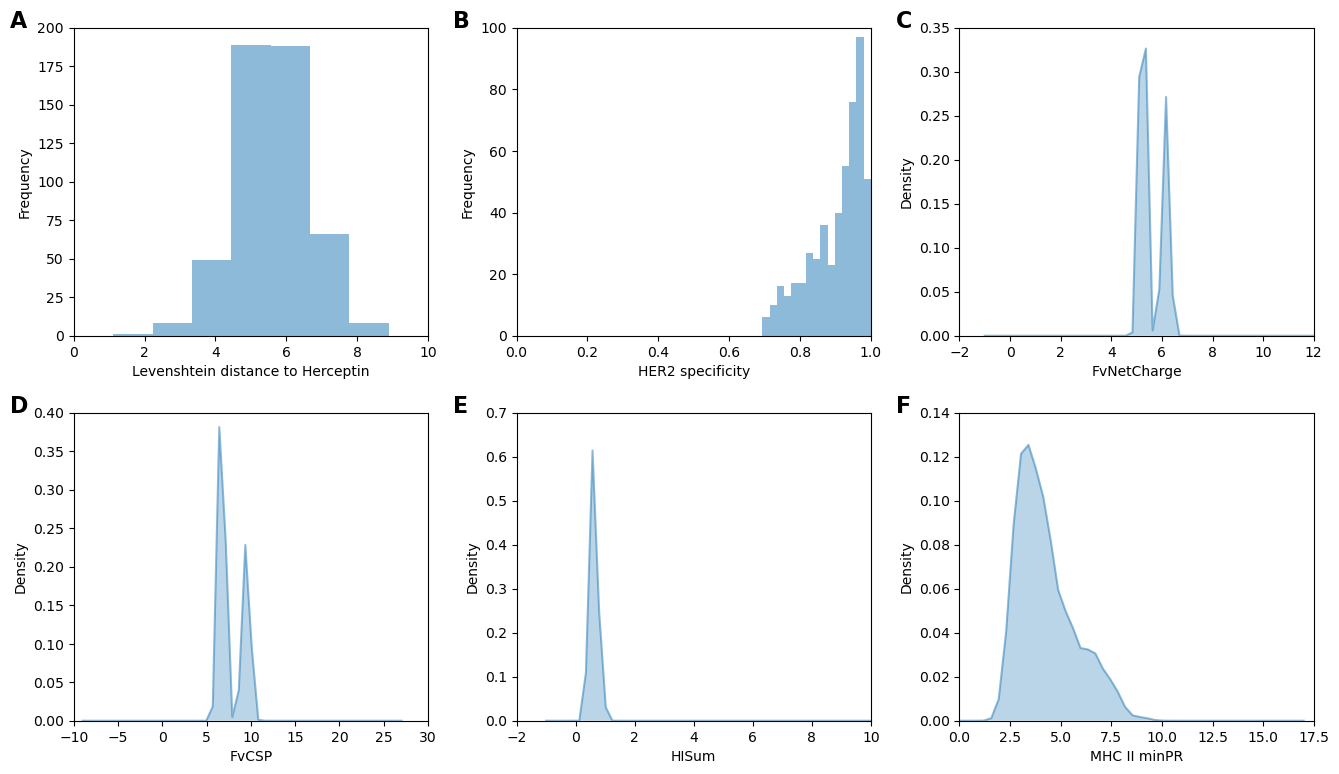

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
plt.subplots_adjust(wspace=0.25, hspace=0.25)

plot_wt_dist_hist(axs[0, 0], legend_loc="upper right", xlabel='Levenshtein distance to Herceptin')
axs[0, 0].text(-0.18, 1, "A", transform=axs[0, 0].transAxes, size=16, weight='bold')

plot_her2_hist(axs[0, 1], legend_loc="upper right", xlabel='HER2 specificity')  # >0.7
axs[0, 1].text(-0.18, 1, "B", transform=axs[0, 1].transAxes, size=16, weight='bold')

plot_FvNetCharge_density(axs[0, 2], legend_loc="upper left", xlabel='FvNetCharge') # < 6.2
axs[0, 2].text(-0.18, 1, "C", transform=axs[0, 2].transAxes, size=16, weight='bold')

plot_FvCSP_density(axs[1, 0], legend_loc="upper left", xlabel='FvCSP') # >6.61
axs[1, 0].text(-0.18, 1, "D", transform=axs[1, 0].transAxes, size=16, weight='bold')


plot_HISum_density(axs[1, 1], legend_loc="upper right", xlabel='HISum')  # [0, 4]
axs[1, 1].text(-0.18, 1, "E", transform=axs[1, 1].transAxes, size=16, weight='bold')


plot_MHC2_density(axs[1, 2],'raw_MHC2', legend_loc="upper right", xlabel='MHC II minPR')  # >2.5
axs[1, 2].text(-0.18, 1, "F", transform=axs[1, 2].transAxes, size=16, weight='bold')

fig.savefig("figures/library_props.pdf", bbox_inches='tight')